# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [183]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [184]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity = []
cloudPercent = []
windSpeed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

594

In [185]:
weather_df = pd.DataFrame(cities).rename(columns={0: "City"})
weather_df.head()

,City
0,tumannyy
1,airai
2,narsaq
3,severo-kurilsk
4,shar


In [186]:
params = {
    "appid": weather_api_key,
    "units": "imperial"
}
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
for index,row in weather_df.iterrows():
    city = row["City"]
    params["q"] = city
    print(f"Processing Record {index} | {city}")
    loopResponse = requests.get(weatherUrl, params=params).json()
    
    try:
        weather_df.loc[index, "Latitude"] = loopResponse['coord']['lat']
        weather_df.loc[index, "Longitude"] = loopResponse['coord']['lon']
        weather_df.loc[index, "Temperature"] = loopResponse['main']['temp']
        weather_df.loc[index, "Humidity"] = loopResponse['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = loopResponse['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = loopResponse['wind']['speed']
        weather_df.loc[index, "Country"] = loopResponse['sys']['country']
        weather_df.loc[index, "Date"] = loopResponse['dt']
        
    except KeyError:
        print("Missing Field... Skipping")

Processing Record 0 | tumannyy
Missing Field... Skipping
Processing Record 1 | airai
Processing Record 2 | narsaq
Processing Record 3 | severo-kurilsk
Processing Record 4 | shar
Processing Record 5 | chokurdakh
Processing Record 6 | oktyabrskiy
Processing Record 7 | albany
Processing Record 8 | khatanga
Processing Record 9 | vaini
Processing Record 10 | east london
Processing Record 11 | samusu
Missing Field... Skipping
Processing Record 12 | dhilwan
Processing Record 13 | barranca
Processing Record 14 | meulaboh
Processing Record 15 | mataura
Processing Record 16 | dikson
Processing Record 17 | taolanaro
Missing Field... Skipping
Processing Record 18 | castro
Processing Record 19 | vardo
Processing Record 20 | lodja
Processing Record 21 | mandalgovi
Processing Record 22 | butaritari
Processing Record 23 | vaitupu
Missing Field... Skipping
Processing Record 24 | torbay
Processing Record 25 | kandrian
Processing Record 26 | jamestown
Processing Record 27 | wuxue
Processing Record 28 | k

Processing Record 233 | champerico
Processing Record 234 | toguchin
Processing Record 235 | ust-kamchatsk
Missing Field... Skipping
Processing Record 236 | lolua
Missing Field... Skipping
Processing Record 237 | sandur
Processing Record 238 | soe
Processing Record 239 | hambantota
Processing Record 240 | whitehorse
Processing Record 241 | caravelas
Processing Record 242 | saskylakh
Processing Record 243 | tiarei
Processing Record 244 | klaksvik
Processing Record 245 | aporawan
Missing Field... Skipping
Processing Record 246 | fort saint james
Processing Record 247 | bandarbeyla
Processing Record 248 | krasnoselkup
Processing Record 249 | richards bay
Processing Record 250 | barentsburg
Missing Field... Skipping
Processing Record 251 | fevralsk
Missing Field... Skipping
Processing Record 252 | kimbe
Processing Record 253 | constitucion
Processing Record 254 | mount gambier
Processing Record 255 | sentyabrskiy
Missing Field... Skipping
Processing Record 256 | dunedin
Processing Record 25

Processing Record 463 | kawalu
Processing Record 464 | beyneu
Processing Record 465 | ewa beach
Processing Record 466 | odweyne
Processing Record 467 | jinchang
Processing Record 468 | iturama
Processing Record 469 | karratha
Processing Record 470 | lucea
Processing Record 471 | royan
Processing Record 472 | halifax
Processing Record 473 | porto velho
Processing Record 474 | tagusao
Processing Record 475 | fraserburgh
Processing Record 476 | sola
Processing Record 477 | saint-raymond
Processing Record 478 | kedougou
Processing Record 479 | loandjili
Processing Record 480 | pevek
Processing Record 481 | merauke
Processing Record 482 | riyadh
Processing Record 483 | chapayevka
Processing Record 484 | rampura
Processing Record 485 | lovozero
Processing Record 486 | akwatia
Processing Record 487 | acapulco
Processing Record 488 | dharmadam
Processing Record 489 | bathsheba
Processing Record 490 | karamken
Missing Field... Skipping
Processing Record 491 | taoudenni
Processing Record 492 | b

In [187]:
weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,tumannyy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,airai,-8.93,125.41,77.58,50.0,6.0,3.47,TL,1.604123e+09
2,narsaq,60.92,-46.05,21.20,79.0,87.0,2.73,GL,1.604123e+09
3,severo-kurilsk,50.68,156.12,40.50,91.0,100.0,35.75,RU,1.604123e+09
4,shar,49.59,81.05,39.56,71.0,100.0,2.48,KZ,1.604123e+09


In [189]:
clean_city_data_df = weather_df.loc[weather_df["Humidity"] <= 100,:]
clean_city_data_df = clean_city_data_df.dropna(how='any')
clean_city_data_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,airai,-8.93,125.41,77.58,50.0,6.0,3.47,TL,1.604123e+09
2,narsaq,60.92,-46.05,21.20,79.0,87.0,2.73,GL,1.604123e+09
3,severo-kurilsk,50.68,156.12,40.50,91.0,100.0,35.75,RU,1.604123e+09
4,shar,49.59,81.05,39.56,71.0,100.0,2.48,KZ,1.604123e+09
5,chokurdakh,70.63,147.92,9.32,96.0,99.0,6.80,RU,1.604123e+09
...,...,...,...,...,...,...,...,...,...
589,sao filipe,14.90,-24.50,80.11,62.0,100.0,16.15,CV,1.604123e+09
590,kenora,49.82,-94.43,33.40,80.0,90.0,14.99,CA,1.604123e+09
591,senanga,-16.12,23.27,80.20,24.0,1.0,9.95,ZM,1.604123e+09
592,nalut,30.33,10.85,53.31,89.0,2.0,7.92,LY,1.604123e+09


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [190]:
#  Get the indices of cities that have humidity over 100%.


In [191]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

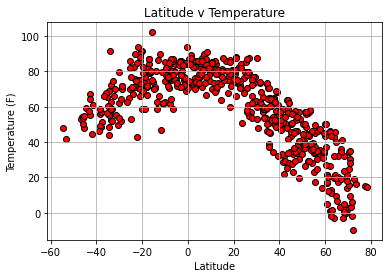

In [192]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

## Latitude vs. Humidity Plot

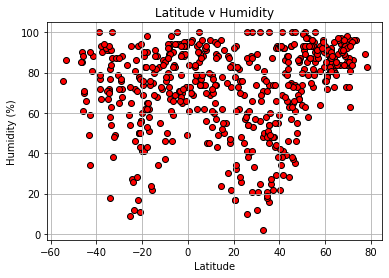

In [194]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

## Latitude vs. Cloudiness Plot

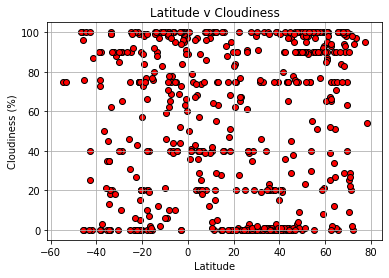

In [195]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

## Latitude vs. Wind Speed Plot

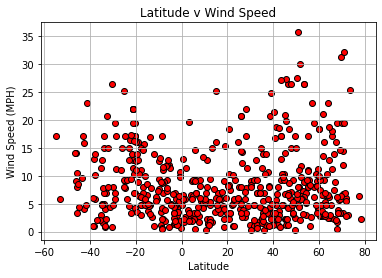

In [196]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7802059488426168


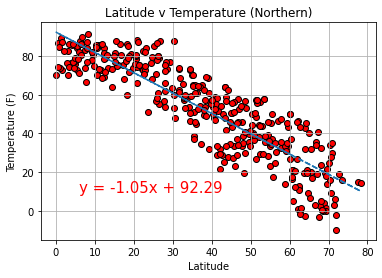

In [211]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4192373996291089


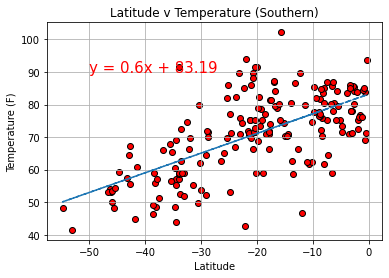

In [212]:
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"])
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08310826157306939


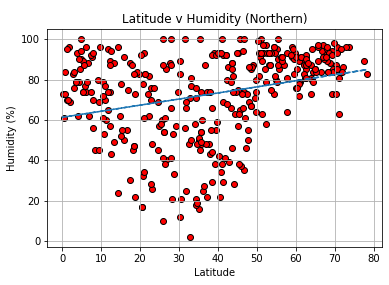

In [213]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,110),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007834922585370878


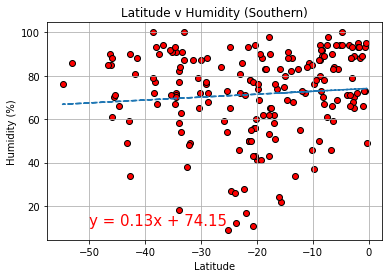

In [248]:
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"])
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04360196411097692


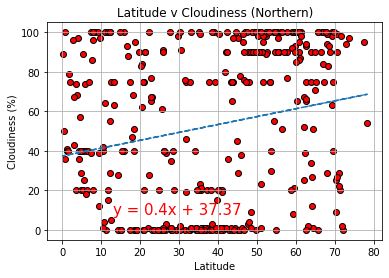

In [247]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Cloudiness"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(13,8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.037107638543974406


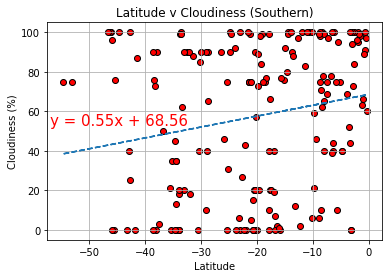

In [226]:
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Cloudiness"])
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-57,53),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03667772269251312


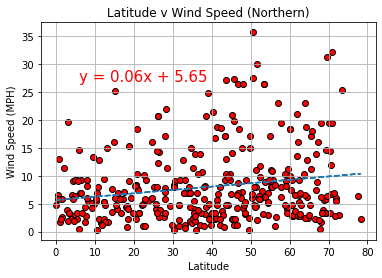

In [229]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Wind Speed"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.045669126977345605


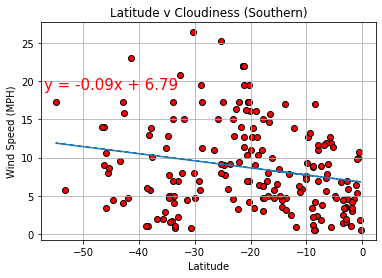

In [234]:
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"], SHcity_data_df["Wind Speed"])
reg_eq = SHcity_data_df["Latitude"]*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-57,19),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")